# 1. Data extraction

Importing all necessary python libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

Import data set

In [2]:
wine = pd.read_csv("./Project Datasets/winequality.csv", sep=";")

In [3]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Explore Dataset like finding 1. null values 2. different Data types and 3. number of records, 4, summurized view

In [4]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
wine.dtypes.value_counts()

float64    11
int64       1
dtype: int64

In [6]:
wine.shape

(1599, 12)

In [7]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# 2. Data Pre-processing

In [9]:
#renaming column names to remove space
wine.rename(columns={'fixed acidity':'fixed_acidity','volatile acidity':'volatile_acidity','citric acid':'citric_acid',
                     'residual sugar':'residual_sugar', 'free sulfur dioxide':'free_sulfur_dioxide',
                     'total sulfur dioxide':'total_sulfur_dioxide'}, inplace=True)
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed_acidity           1599 non-null float64
volatile_acidity        1599 non-null float64
citric_acid             1599 non-null float64
residual_sugar          1599 non-null float64
chlorides               1599 non-null float64
free_sulfur_dioxide     1599 non-null float64
total_sulfur_dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [10]:
#remove duplicates if there is any
wine.drop_duplicates(inplace=True)

In [11]:
wine.shape

(1359, 12)

In [ ]:
# checking discrete value for output "Quality" and classifying them into "poor", "avg" and "premium" 

In [12]:
wine.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [13]:
wine.quality.value_counts().sort_index()

3     10
4     53
5    577
6    535
7    167
8     17
Name: quality, dtype: int64

In [14]:
#classifying by adding one more column "rating"
cond = [(wine.quality >=7),(wine.quality <=4)]
rating=["premium","faulty"]
wine["rating"] = np.select(cond,rating,'average')

In [15]:
wine['rating'].unique()

array(['average', 'premium', 'faulty'], dtype=object)

In [22]:
wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,rating
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,average
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,average
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,average
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,average
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,average


In [16]:
wine.groupby(by="rating").mean()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
rating,,,,,,,,,,,,
average,8.251169,0.538898,0.261286,2.484397,0.089691,16.428058,49.424910,0.996834,3.309083,0.648094,10.259173,5.481115
faulty,7.871429,0.724206,0.173651,2.684921,0.095730,12.063492,34.444444,0.996689,3.384127,0.592222,10.215873,3.841270
premium,8.820109,0.405870,0.372880,2.703804,0.076049,13.972826,35.358696,0.995963,3.288587,0.745598,11.552808,7.092391


# Visualization and Analysis

Univeriant Analysis:

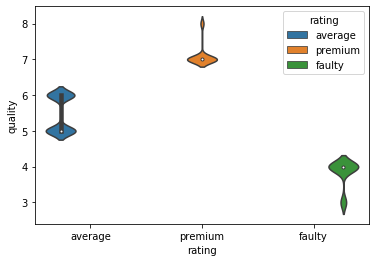

In [26]:
sns.violinplot("rating", y='quality',data=wine, hue='rating')

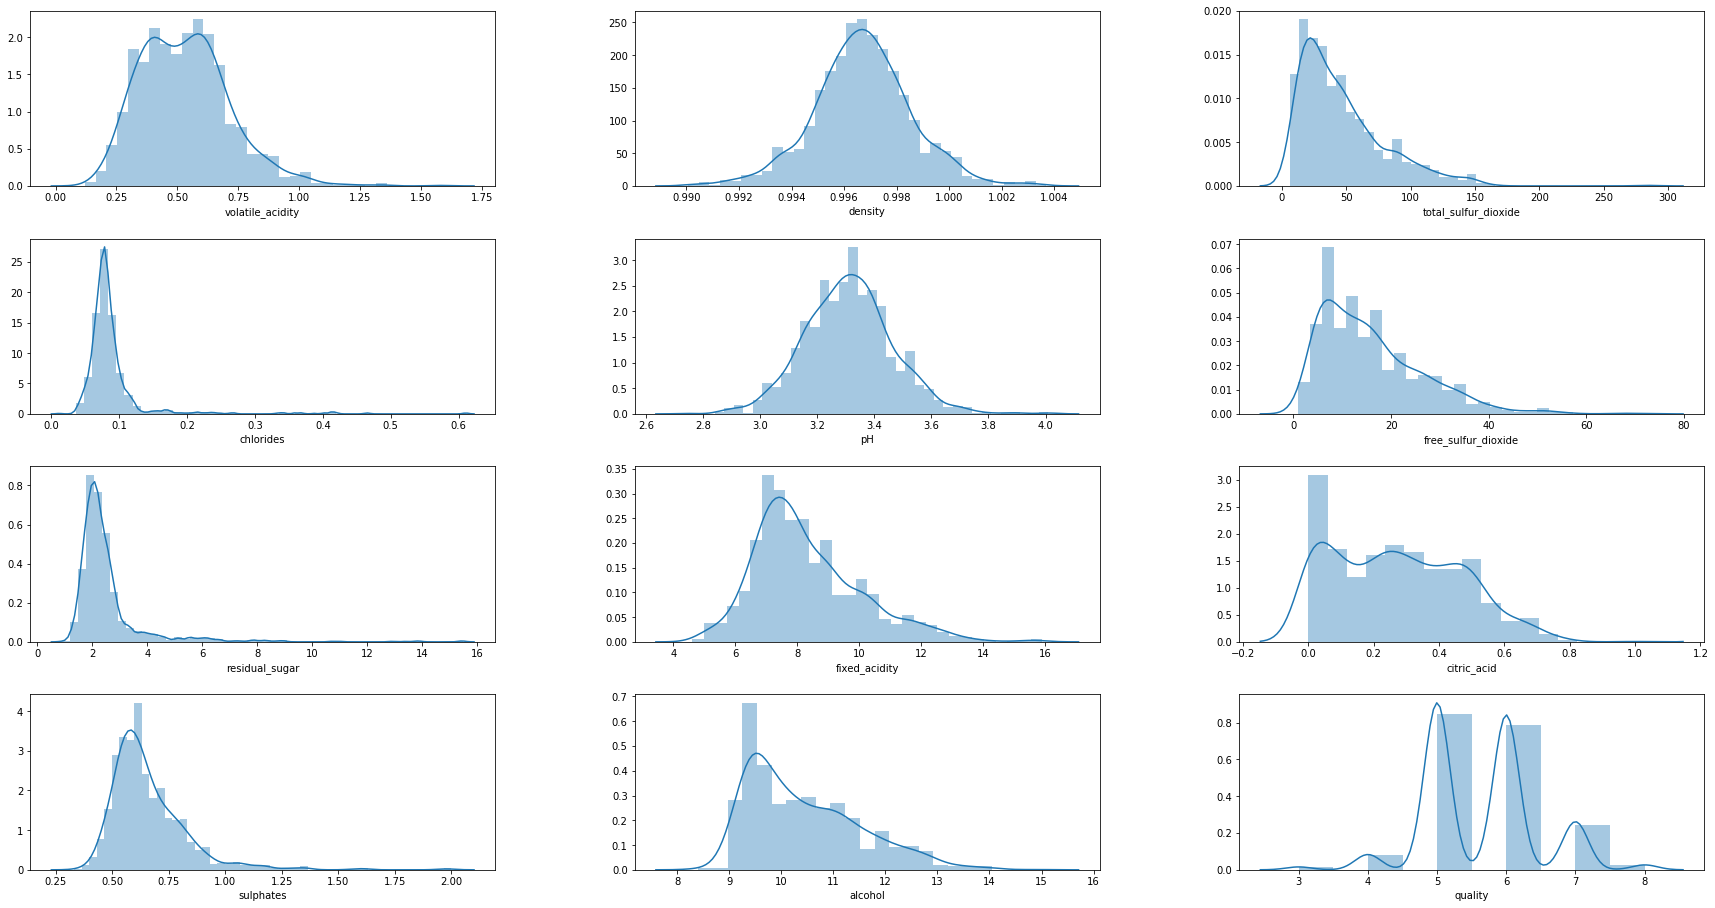

In [113]:
# how each component data distribution is there in the given data source
plt.figure(figsize=(30,20))
plt.subplots_adjust(hspace=0.3, wspace=0.3)
plt.subplot(531)
sns.distplot(wine.volatile_acidity)
plt.subplot(532)
sns.distplot(wine.density)
plt.subplot(533)
sns.distplot(wine.total_sulfur_dioxide)
plt.subplot(534)
sns.distplot(wine.chlorides)
plt.subplot(535)
sns.distplot(wine.pH)
plt.subplot(536)
sns.distplot(wine.free_sulfur_dioxide)
plt.subplot(537)
sns.distplot(wine.residual_sugar)
plt.subplot(538)
sns.distplot(wine.fixed_acidity)
plt.subplot(539)
sns.distplot(wine.citric_acid)
plt.subplot(5,3,10)
sns.distplot(wine.sulphates)
plt.subplot(5,3,11)
sns.distplot(wine.alcohol)
plt.subplot(5,3,12)
sns.distplot(wine.quality, bins=10)
plt.show()


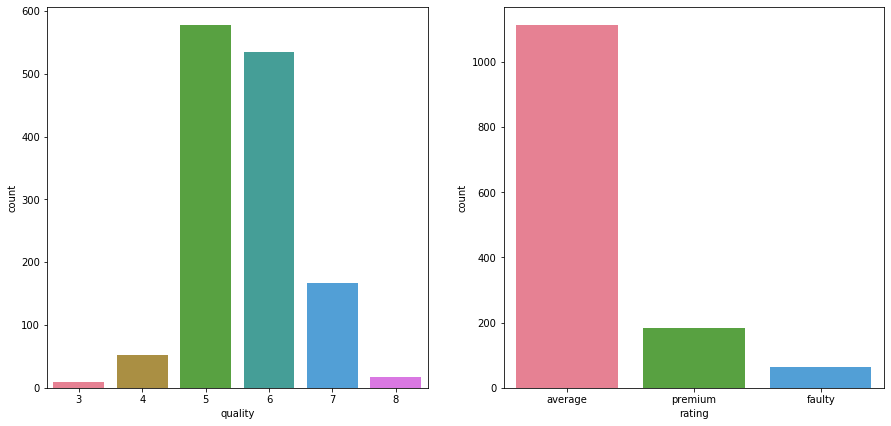

In [30]:
# Visualization for different quality wines
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sns.countplot(wine.quality, palette='husl')
plt.subplot(1,2,2)
sns.countplot(wine['rating'], palette='husl' )
plt.show()

Bivariant Anaysis

C:\Users\nites\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\nites\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


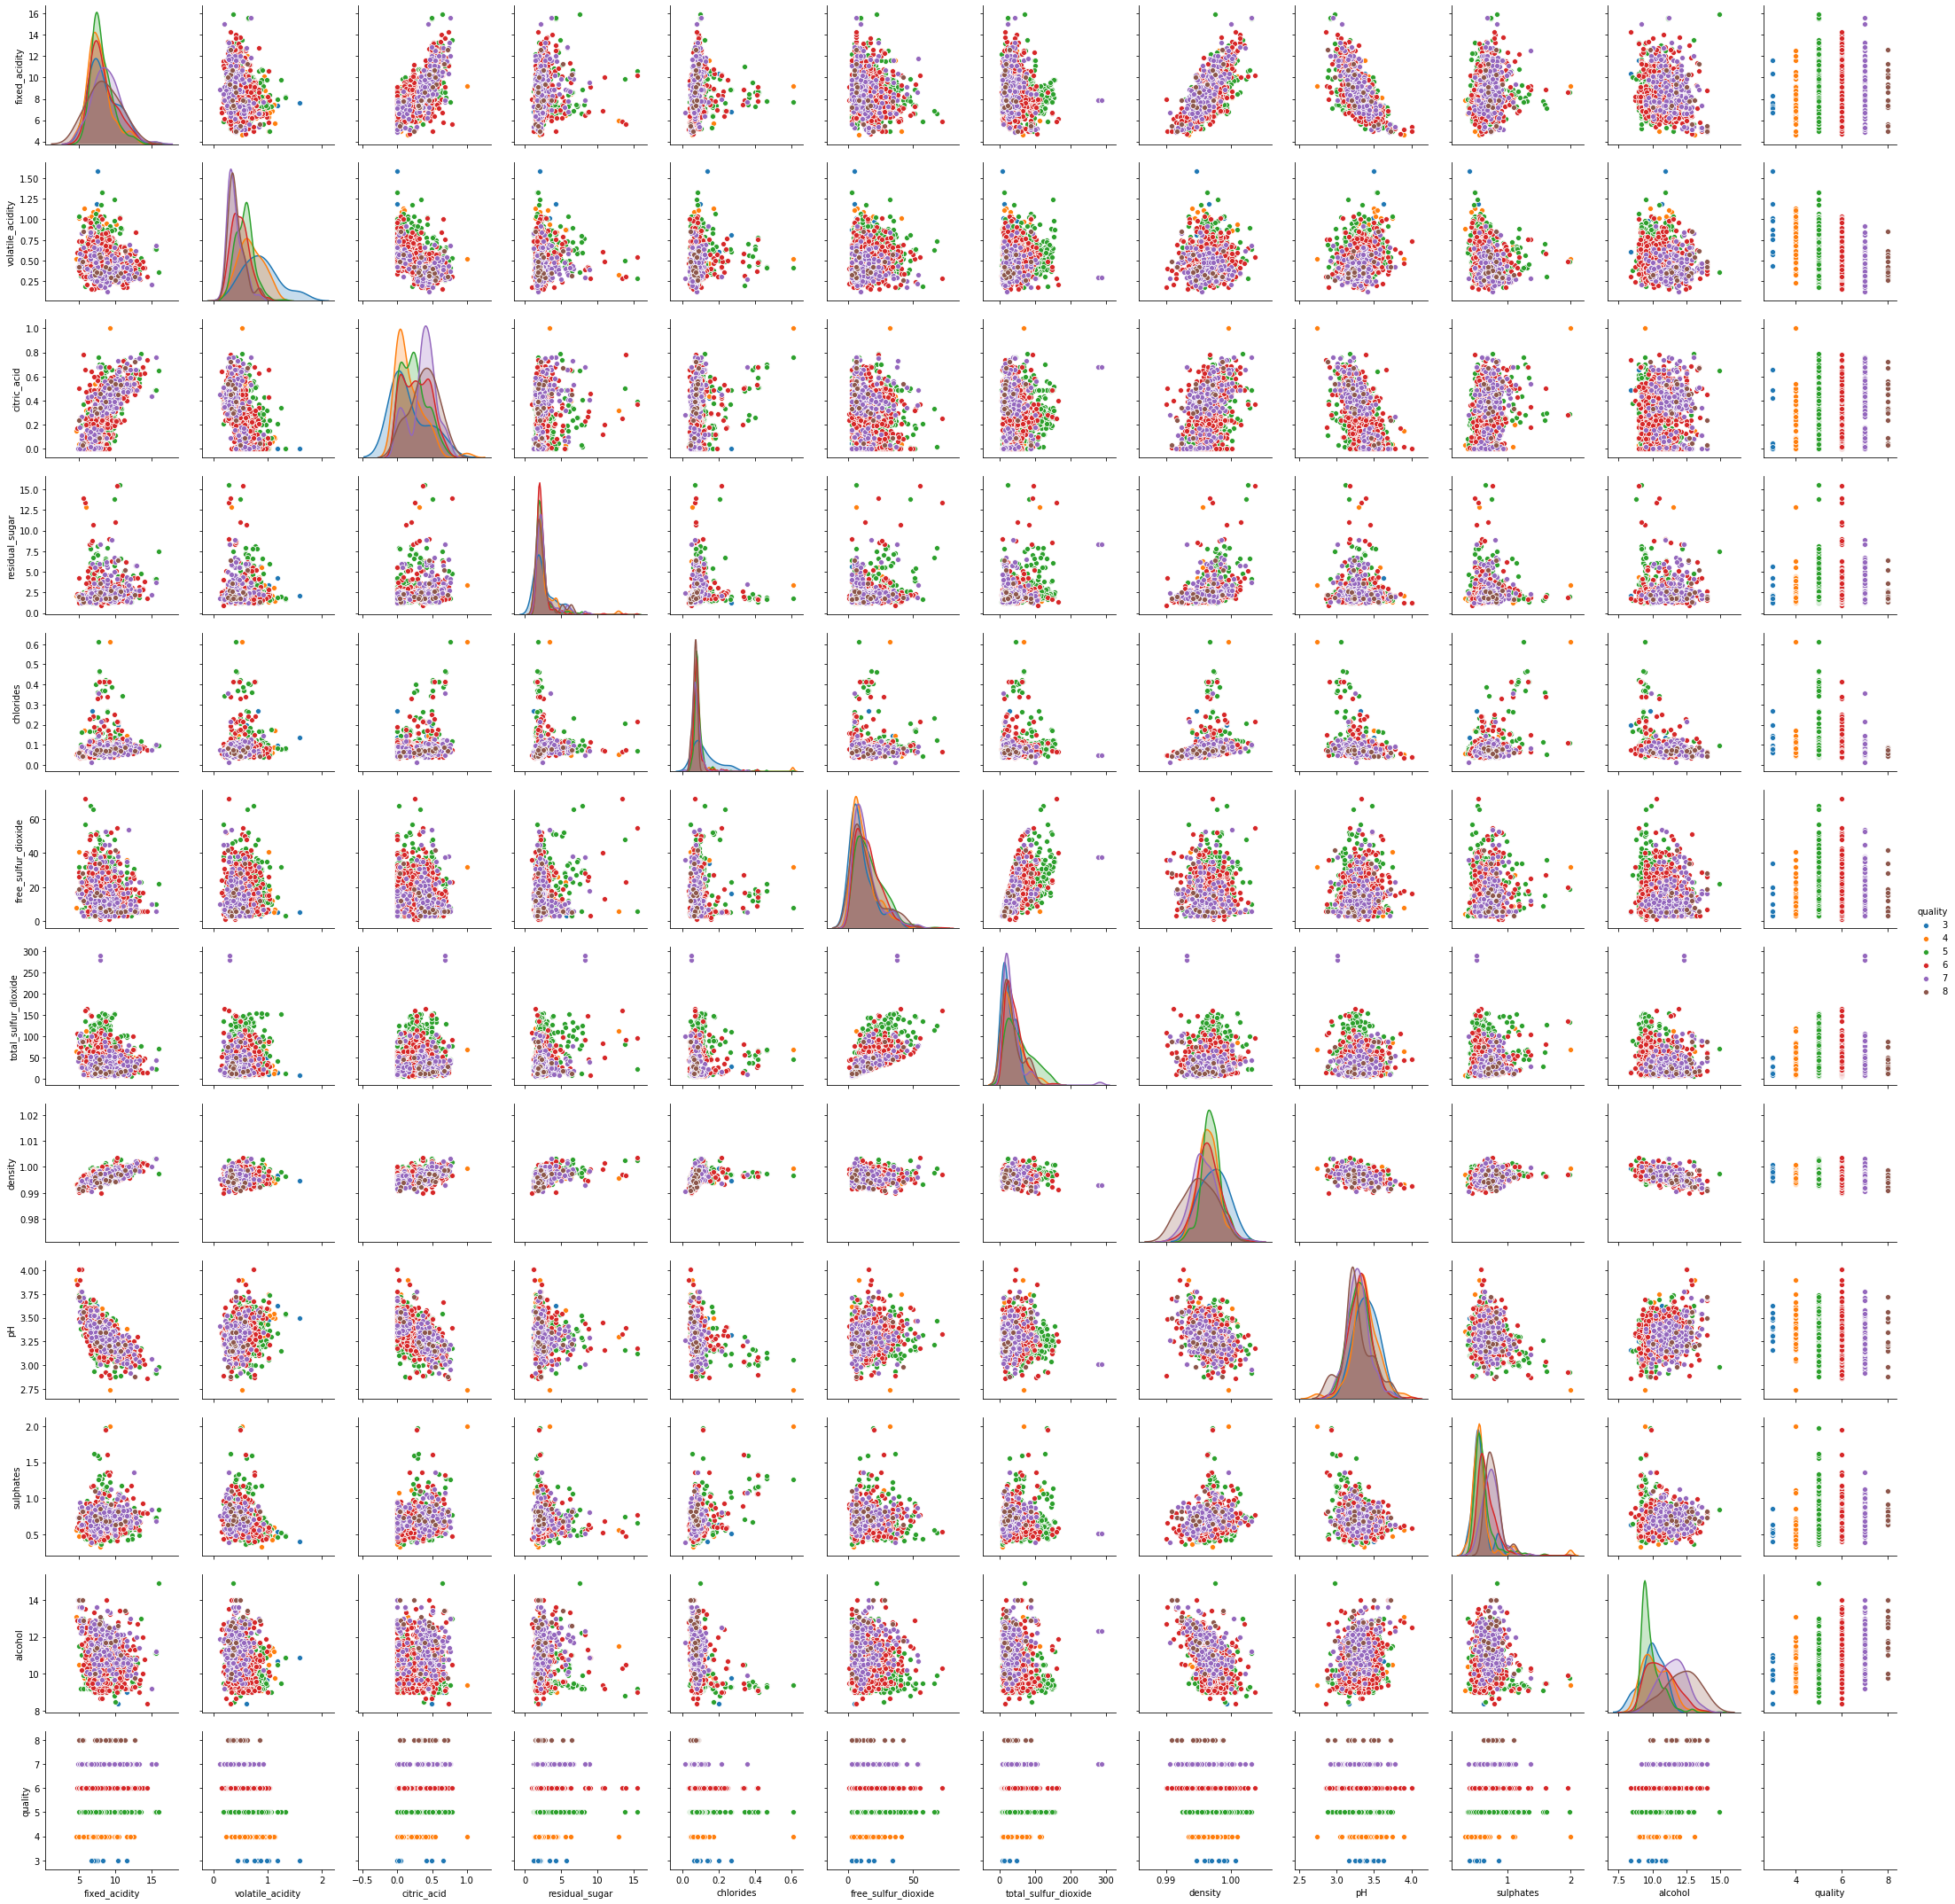

In [27]:
# ploting pair plot to see mutual dependencies 
sns.pairplot(wine, hue='quality')

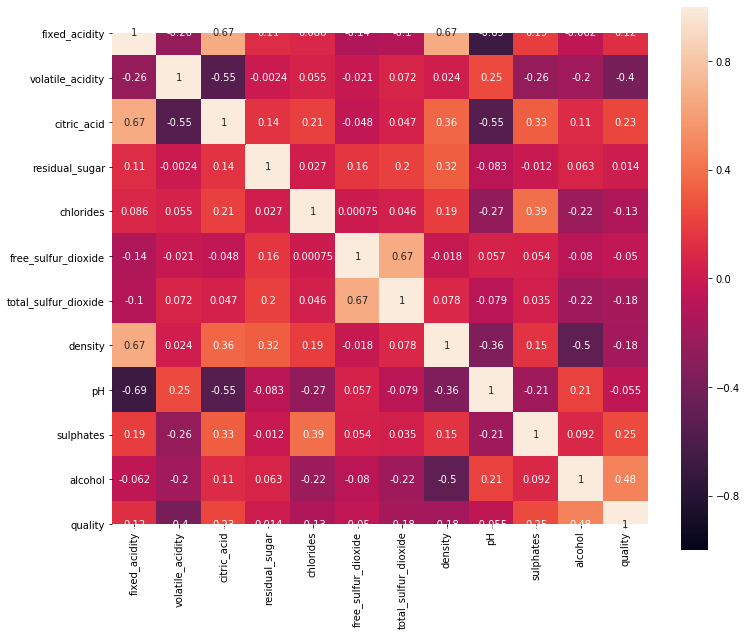

In [62]:
#check the co-relation using heat map
plt.figure(figsize=(12,10))
corr = wine.corr()
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, square=True )
plt.xticks(rotation=90)
plt.show()


In [30]:
corr.quality.sort_values()

volatile_acidity       -0.395214
density                -0.184252
total_sulfur_dioxide   -0.177855
chlorides              -0.130988
pH                     -0.055245
free_sulfur_dioxide    -0.050463
residual_sugar          0.013640
fixed_acidity           0.119024
citric_acid             0.228057
sulphates               0.248835
alcohol                 0.480343
quality                 1.000000
Name: quality, dtype: float64

How alcohol and volatile_acidity is impacting Wine quality

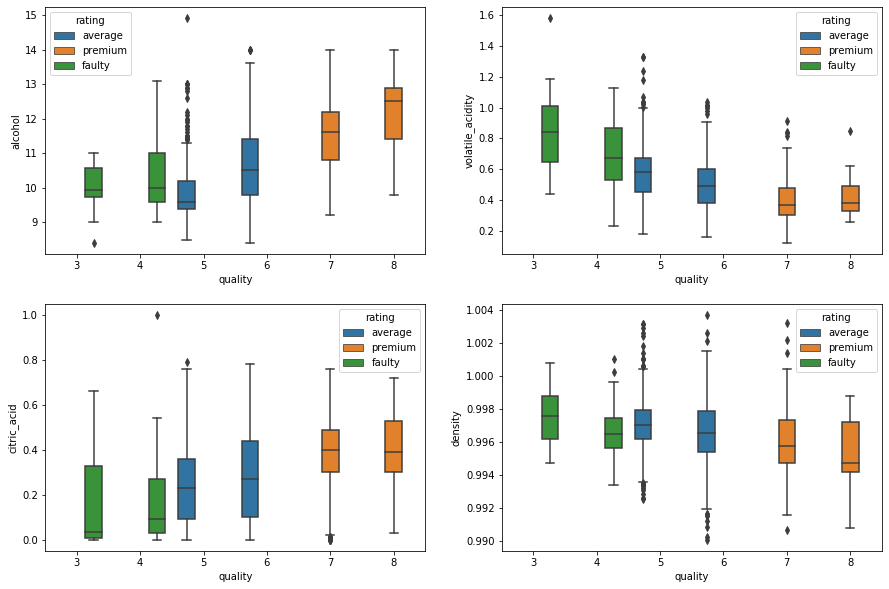

In [84]:
plt.figure(figsize=(15,10))
plt.subplot(221)
sns.boxplot('quality', 'alcohol', hue='rating', data=wine)
plt.subplot(222)
sns.boxplot('quality', 'volatile_acidity', hue='rating', data=wine)
plt.subplot(223)
sns.boxplot('quality', 'citric_acid', hue='rating', data=wine)
plt.subplot(224)
sns.boxplot('quality', 'density', hue='rating', data=wine)


from pairplot and correlation we have found that fixed acidity is having linear relation with density and ph. The correlation is around 12 between fixed acidity and quality.Lets observe their trend for different quality wines:  

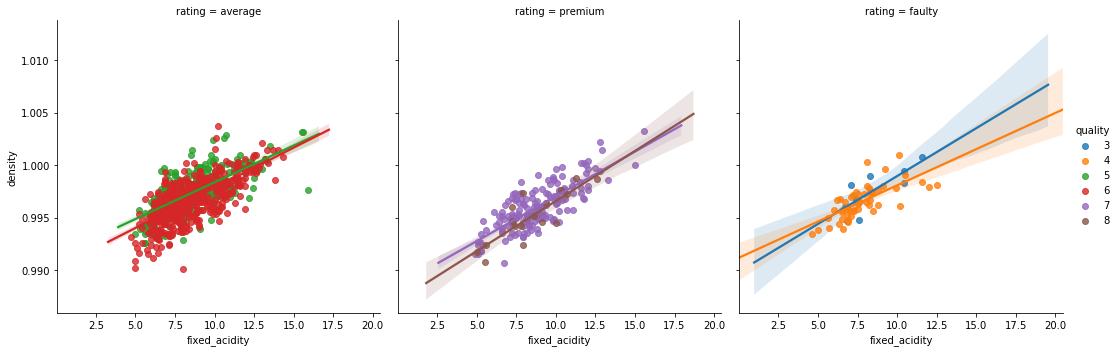

In [85]:
sns.lmplot(x='fixed_acidity', y='density', data=wine, hue='quality', col='rating')

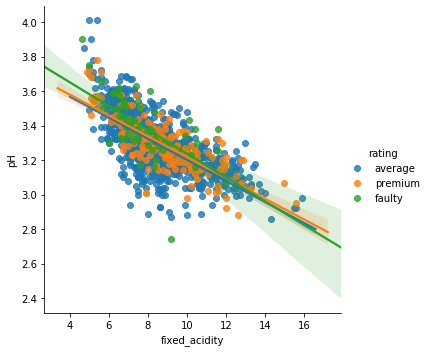

In [102]:
sns.lmplot(x='fixed_acidity', y='pH', data=wine, hue='rating')

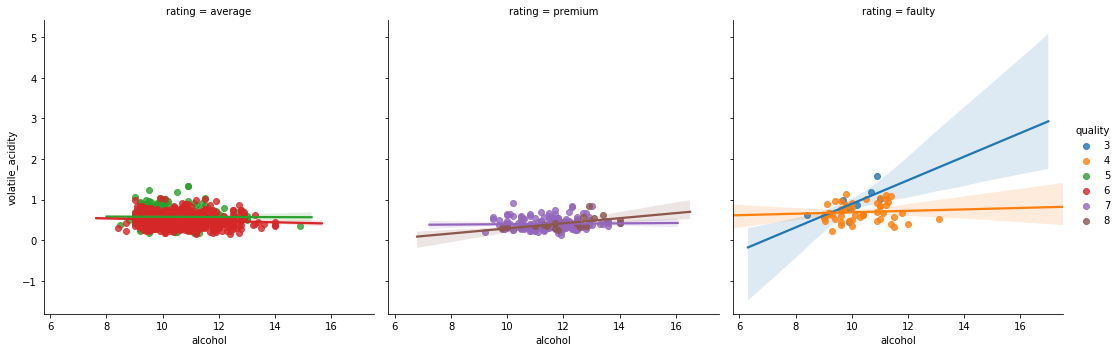

In [103]:
sns.lmplot(x='alcohol', y='volatile_acidity', data=wine, hue='quality', col='rating')